 Objective:
 _________
 Objective of this data set is to find the patient will survive 5 years or longer or else patient will died before 5 years.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load haberman dataset
data = pd.read_csv('haberman.csv')

# no. of data-points and features
data.shape

(305, 4)

In [2]:
# set columns names to dataset
data.columns = ['Age','Op_Year','axil_nodes_det','Status']
data.columns

Index(['Age', 'Op_Year', 'axil_nodes_det', 'Status'], dtype='object')

In [3]:
# no. of data-points in each class
data['Status'].value_counts()

1    224
2     81
Name: Status, dtype: int64

Observations:
-------------
        1. 224 data-points belongs to class1.
        2. 81 data-points belongs to class2.

In [4]:
# divide the target values into lists by using class names
class1 = data.loc[data['Status'] == 1]
class2 = data.loc[data['Status'] == 2]

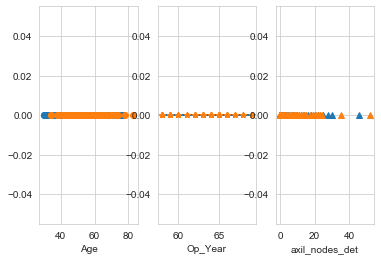

In [5]:
# 1D-scatter plot
import numpy as np
sns.set_style("whitegrid");
plt.figure(1)
plt.subplot(1,3,1)
plt.plot(class1['Age'],np.zeros_like(class1['Age']),'o')
plt.plot(class2['Age'],np.zeros_like(class2['Age']),'o')
plt.xlabel('Age')
plt.subplot(1,3,2)
plt.plot(class1['Op_Year'],np.zeros_like(class1['Op_Year']),'-')
plt.plot(class2['Op_Year'],np.zeros_like(class2['Op_Year']),'*')
plt.xlabel('Op_Year')
plt.subplot(1,3,3)
plt.plot(class1['axil_nodes_det'],np.zeros_like(class1['axil_nodes_det']),'^')
plt.plot(class2['axil_nodes_det'],np.zeros_like(class2['axil_nodes_det']),'^')
plt.xlabel('axil_nodes_det')
plt.show()

Obesrvations:
-------------
        1. From the 1D-scatter plot of 'Age' we can't predict the target value because all points are overlapped to each other.
        2. From the 1D-scatter plot of 'Op_Year' we can't predict the target value because all points are overlapped to each other.
        3. From the 1D-scatter plot of 'axil_nodes_det' we can't predict the target value because all points are overlapped to each other.
        
Note: We can't predict the target value by using single feature.


C:\Users\sanjeev\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


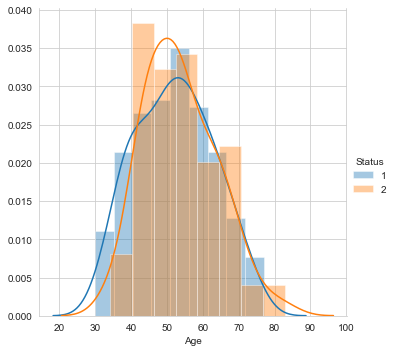

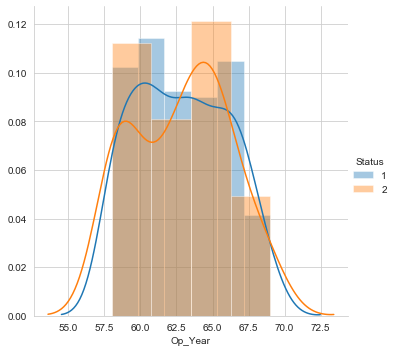

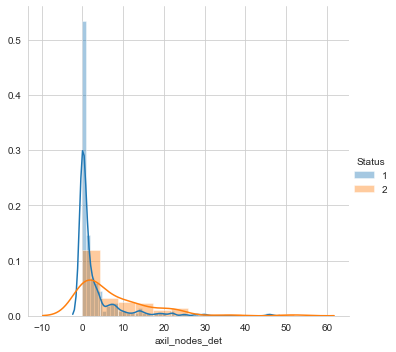

In [6]:
# Histograms and Probability Density Functions (PDF)
plt.close()
sns.FacetGrid(data, hue="Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.xlabel('Age')
plt.show();
plt.close()
sns.FacetGrid(data, hue="Status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.xlabel('Op_Year')
plt.show();
plt.close()
sns.FacetGrid(data, hue="Status", size=5) \
   .map(sns.distplot, "axil_nodes_det") \
   .add_legend();
plt.xlabel('axil_nodes_det')
plt.show();

Observations:
-------------
        All data-points are overlapped in each feature.

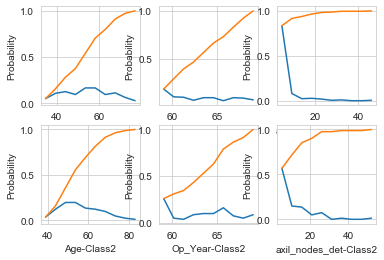

In [7]:
# Cumulative Distribution Function (CDF)
plt.close()
plt.figure(1)
counts,bin_edges = np.histogram(class1['Age'],bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.subplot(2,3,1)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Age-Class1')
plt.ylabel('Probability')
counts,bin_edges = np.histogram(class2['Age'],bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.subplot(2,3,4)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Age-Class2')
plt.ylabel('Probability')
counts,bin_edges = np.histogram(class1['Op_Year'],bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.subplot(2,3,2)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Op_Year-Class1')
plt.ylabel('Probability')
counts,bin_edges = np.histogram(class2['Op_Year'],bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.subplot(2,3,5)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Op_Year-Class2')
plt.ylabel('Probability')
counts,bin_edges = np.histogram(class1['axil_nodes_det'],bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.subplot(2,3,3)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('axil_nodes_det-Class1')
plt.ylabel('Probability')
counts,bin_edges = np.histogram(class2['axil_nodes_det'],bins=10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.subplot(2,3,6)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('axil_nodes_det-Class2')
plt.ylabel('Probability')
plt.show()


Observations:
-------------
        1. 77% of Class1 age feature values <=60.
        2. 70% of Class1 Op_Year feature values <=65.
        3. 90% of Class2 axil_nodes_det feature values <=20.
        

In [8]:
# Means
print("Mean:")
print("Class1 - Age            : ",np.mean(class1['Age']))
print("Class2 - Age            : ",np.mean(class2['Age']))
print("Class1 - Op_Year        : ",np.mean(class1['Op_Year']))
print("Class2 - Op_Year        : ",np.mean(class1['Op_Year']))
print("Class1 - axil_nodes_det : ",np.mean(class1['axil_nodes_det']))
print("Class2 - axil_nodes_det : ",np.mean(class2['axil_nodes_det']))

Mean:
Class1 - Age            :  52.11607142857143
Class2 - Age            :  53.67901234567901
Class1 - Op_Year        :  62.857142857142854
Class2 - Op_Year        :  62.857142857142854
Class1 - axil_nodes_det :  2.799107142857143
Class2 - axil_nodes_det :  7.45679012345679


In [9]:
# Std-dev
print("Std-dev:")
print("Class1 - Age            : ",np.std(class1['Age']))
print("Class2 - Age            : ",np.std(class2['Age']))
print("Class1 - Op_Year        : ",np.std(class1['Op_Year']))
print("Class2 - Op_Year        : ",np.std(class1['Op_Year']))
print("Class1 - axil_nodes_det : ",np.std(class1['axil_nodes_det']))
print("Class2 - axil_nodes_det : ",np.std(class2['axil_nodes_det']))

Std-dev:
Class1 - Age            :  10.913004640364269
Class2 - Age            :  10.10418219303131
Class1 - Op_Year        :  3.2220145175061514
Class2 - Op_Year        :  3.2220145175061514
Class1 - axil_nodes_det :  5.869092706952767
Class2 - axil_nodes_det :  9.128776076761632


In [10]:
# Median
print("Median:")
print("Class1 - Age            : ",np.median(class1['Age']))
print("Class2 - Age            : ",np.median(class2['Age']))
print("Class1 - Op_Year        : ",np.median(class1['Op_Year']))
print("Class2 - Op_Year        : ",np.median(class1['Op_Year']))
print("Class1 - axil_nodes_det : ",np.median(class1['axil_nodes_det']))
print("Class2 - axil_nodes_det : ",np.median(class2['axil_nodes_det']))

Median:
Class1 - Age            :  52.0
Class2 - Age            :  53.0
Class1 - Op_Year        :  63.0
Class2 - Op_Year        :  63.0
Class1 - axil_nodes_det :  0.0
Class2 - axil_nodes_det :  4.0


In [11]:
# Quantiles
print("Quantiles:")
print("Class1 - Age            : ",np.percentile(class1['Age'],np.arange(0,100,25)))
print("Class2 - Age            : ",np.percentile(class2['Age'],np.arange(0,100,25)))
print("Class1 - Op_Year        : ",np.percentile(class1['Op_Year'],np.arange(0,100,25)))
print("Class2 - Op_Year        : ",np.percentile(class1['Op_Year'],np.arange(0,100,25)))
print("Class1 - axil_nodes_det : ",np.percentile(class1['axil_nodes_det'],np.arange(0,100,25)))
print("Class2 - axil_nodes_det : ",np.percentile(class2['axil_nodes_det'],np.arange(0,100,25)))

Quantiles:
Class1 - Age            :  [30. 43. 52. 60.]
Class2 - Age            :  [34. 46. 53. 61.]
Class1 - Op_Year        :  [58. 60. 63. 66.]
Class2 - Op_Year        :  [58. 60. 63. 66.]
Class1 - axil_nodes_det :  [0. 0. 0. 3.]
Class2 - axil_nodes_det :  [ 0.  1.  4. 11.]


In [12]:
from statsmodels import robust

# Median Absolute Deviation
print("Median Absolute Deviation:")
print("Class1 - Age            : ",robust.mad(class1['Age']))
print("Class2 - Age            : ",robust.mad(class2['Age']))
print("Class1 - Op_Year        : ",robust.mad(class1['Op_Year']))
print("Class2 - Op_Year        : ",robust.mad(class1['Op_Year']))
print("Class1 - axil_nodes_det : ",robust.mad(class1['axil_nodes_det']))
print("Class2 - axil_nodes_det : ",robust.mad(class2['axil_nodes_det']))

Median Absolute Deviation:
Class1 - Age            :  13.343419966550417
Class2 - Age            :  11.860817748044816
Class1 - Op_Year        :  4.447806655516806
Class2 - Op_Year        :  4.447806655516806
Class1 - axil_nodes_det :  0.0
Class2 - axil_nodes_det :  5.930408874022408


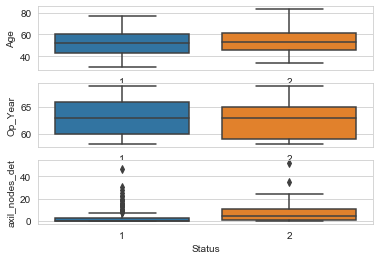

In [13]:
# box ploting
plt.close()
plt.figure(1)
plt.subplot(3,1,1)
sns.boxplot(x='Status',y='Age',data=data)
plt.subplot(3,1,2)
sns.boxplot(x='Status',y='Op_Year',data=data)
plt.subplot(3,1,3)
sns.boxplot(x='Status',y='axil_nodes_det',data=data)
plt.show()

Observations:
-------------
    1. Class1 - Age: 25th percentile -> 42
                     50th percentile -> 51
                     75th percentile -> 60
    2. Class2 - Op_Year : 25th percentile -> 51
                          50th percentile -> 63
                          75th percentile -> 65
    

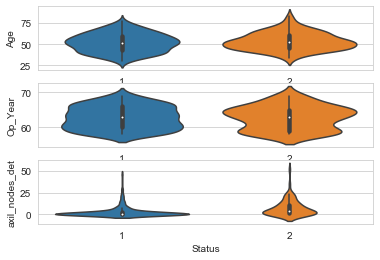

In [14]:
# Violin ploting
plt.close()
plt.figure(1)
plt.subplot(3,1,1)
sns.violinplot(x='Status',y='Age',data=data)
plt.subplot(3,1,2)
sns.violinplot(x='Status',y='Op_Year',data=data)
plt.subplot(3,1,3)
sns.violinplot(x='Status',y='axil_nodes_det',data=data)
plt.show()

C:\Users\sanjeev\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


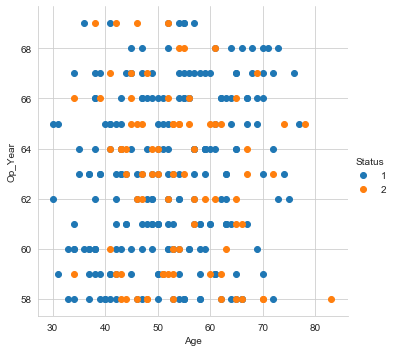

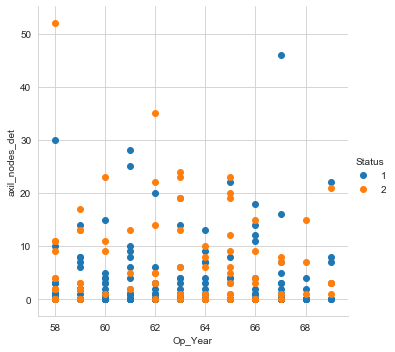

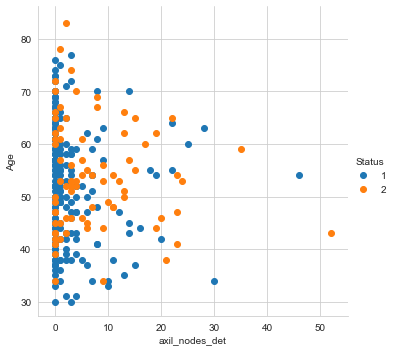

In [15]:
plt.close()

# 2D-Scatter ploting
sns.FacetGrid(data, hue="Status", size=5) \
   .map(plt.scatter, "Age","Op_Year") \
   .add_legend();
plt.xlabel('Age')
plt.ylabel('Op_Year')
plt.show();
sns.FacetGrid(data, hue="Status", size=5) \
   .map(plt.scatter, "Op_Year","axil_nodes_det") \
   .add_legend();
plt.xlabel('Op_Year')
plt.ylabel("axil_nodes_det")
plt.show();
sns.FacetGrid(data, hue="Status", size=5) \
   .map(plt.scatter, "axil_nodes_det","Age") \
   .add_legend();
plt.xlabel('axil_nodes_det')
plt.ylabel('Age')
plt.show();

Observations:
-------------
        All points are overlapped.

C:\Users\sanjeev\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


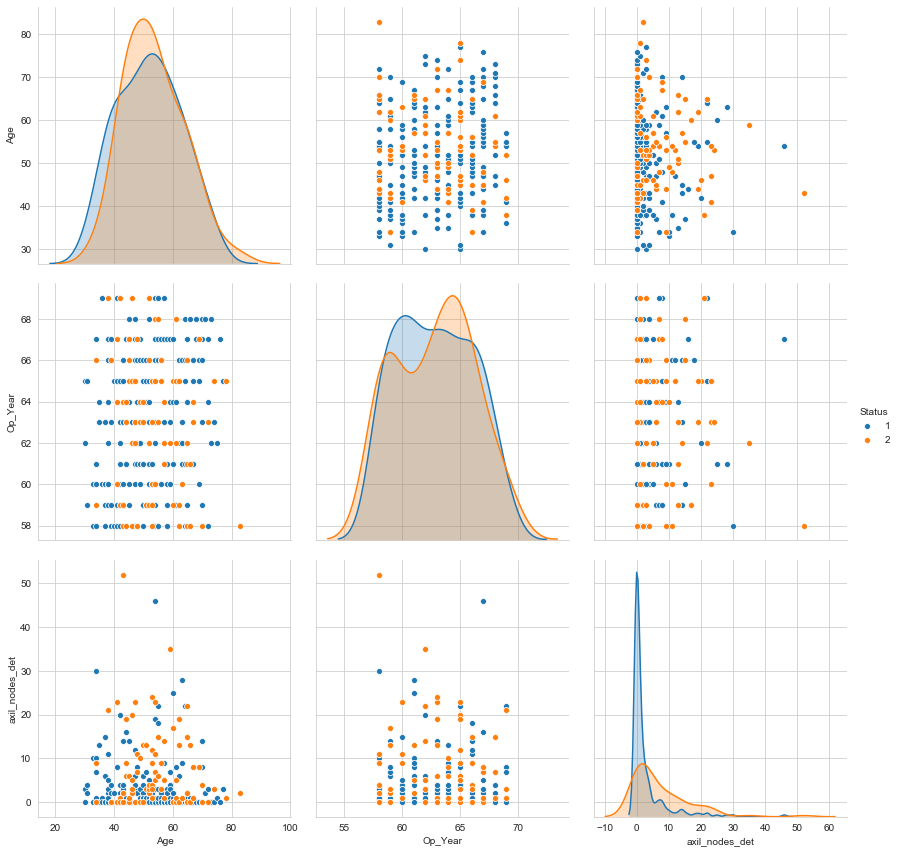

In [16]:
plt.close()

# Pair ploting
sns.set_style("whitegrid");
sns.pairplot(data, hue="Status",vars=['Age','Op_Year','axil_nodes_det'],size=4);
plt.show()

## Conclusion

We can't predict the target value by using single feature.